<img style="width: 300px; padding: 0px;" src="ToyNetworkCommunities.png" alt="title pics"/>


<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Finding communities in a network </b></p>

<p style="text-align:center; font-size:24px; margin-bottom: 32px;"><b> Satoru Hayasaka, Ph.D.</b></p>


<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>December 18, 2019</b></p>

<hr style="height:5px;border:none" />

# 1. What is a network?
<hr style="height:1px;border:none" />

## 1.1 Nodes & edges
A network consists of a collection of:

  * **Nodes**: Also known as *vertices*. Nodes represent individual units. A node can be:
     * A person (in a social network)
     * A gene (in a gene expression network)
     * A computer server (in a computer network)
     * And so on...
  * **Edges**: Also known as *arcs* or *connections*. Edges represent relationships between units. An edge can be 
     * A friendship between people (in a social network)
     * A gene-gene association (in a gene expression network) 
     * A cable (in a computer network)
     * And so on...

<img style="width: 600px; padding: 0px;" src="Title_Graph.png" alt="Sample network"/>

<p style="text-align:center; font-size:12px; margin-top: 5px; margin-left:50px; margin-right:50px; margin-bottom:30px"> S&amp;P500 network: Nodes=companies, edges=strong correlations in stock prices. Visualized by Gephi. </p>


**Network data** describe relationships among a collection of units. A network is also referred as a **graph**. To examine properties of networks, we use methods based on a branch of mathematics known as *graph theory*.

## 1.2 Example networks

### Les Miserables interaction network

In this example, each node in this network is a character from Victor Hugo's novel, Les Miserables. Edges represent interactions among characters. As you can imagine, the main character, Valjean, is the center of this network.

In [1]:
%matplotlib inline

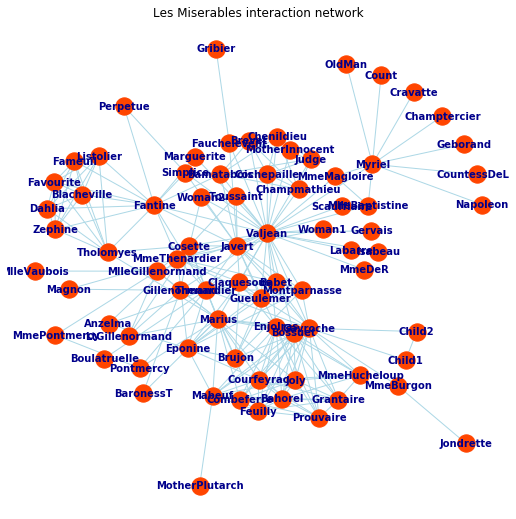

In [30]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# loading the Les Miserables network
G = nx.read_gml(os.path.join('NetworkData','lesmis.gml'))

# drawing the graph  --- Kamada-Kawai layout
plt.figure(figsize=[9,9])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color='orangered')
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='darkblue',
                        font_weight='bold')
plt.axis('off')
plt.title('Les Miserables interaction network')
plt.show()



### Adjacency matrix

A network can be described as a matrix describing edges between nodes, known as an adjacency matrix. Rows and columns in an adjacency matrix represents nodes.

In [31]:
A = nx.adjacency_matrix(G)
NetworkData = pd.DataFrame(A.todense(), columns=G.nodes())
NetworkData['Nodes'] = G.nodes()
NetworkData.set_index('Nodes', inplace=True)

In [32]:
NetworkData

,Myriel,Napoleon,MlleBaptistine,MmeMagloire,CountessDeLo,Geborand,Champtercier,Cravatte,Count,OldMan,...,MotherPlutarch,Gueulemer,Babet,Claquesous,Montparnasse,Toussaint,Child1,Child2,Brujon,MmeHucheloup
Nodes,,,,,,,,,,,,,,,,,,,,,
Myriel,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Napoleon,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MlleBaptistine,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MmeMagloire,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CountessDeLo,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toussaint,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Child1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Child2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


The entire adjacency matrix show as an image.

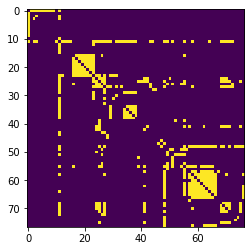

In [33]:
plt.imshow(A.todense())
plt.show()

Presence or absence of edges is denoted by 1's or 0's, respectively

### Brain connectivity network

This network represents how 188 distinct brain areas communicate with each other, captured by functional MRI. 
  * Nodes: distinct brain areas
  * Edges: strong temporal correlations in fMRI signals between brain areas.

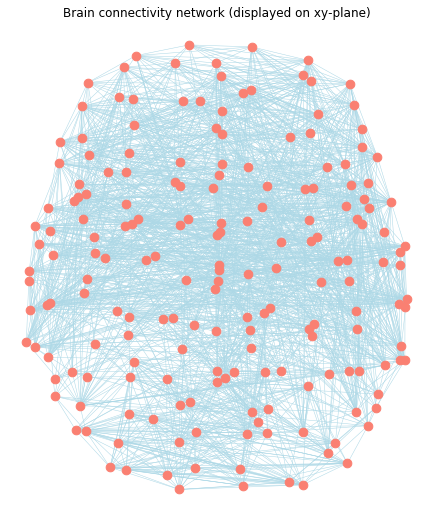

In [46]:
# Files for the brain network data
fTS = os.path.join('NetworkData','Oxford_sub16112_Rt2_K200.npz')
fG = os.path.join('NetworkData','Oxford_sub16112_WBWMCSF_Rt2_K200_deg20.adjlist')

# reading node info and the adjacency info
nodes = np.load(fTS)['nodes']
xyz = np.load(fTS)['xyz']
G = nx.read_adjlist(fG, nodetype=int)



###### drawing the graph
# dictionary of xy-coordinates
pos = {}
for iROI in range(len(nodes)):
    pos[nodes[iROI]] = xyz[iROI,:2]

plt.figure(figsize=[7.5,9])
nx.draw_networkx_nodes(G, pos, node_color='salmon', node_size=75)
nx.draw_networkx_edges(G, pos, width=0.5, edge_color='lightblue')
plt.axis('off')
plt.title('Brain connectivity network (displayed on xy-plane)')
plt.show()


# 2. Network communities
<hr style="height:1px;border:none" />

## 2.1 Motivating example

In some network data, you may observe that some nodes are strongly interconnected among themselves, forming clusters. On the other hand, connections between such clusters are very sparse. Such interconnected clusters of nodes are often referred as **clusters**, **communities**, or **modules**. Here is a toy example of such clusters.

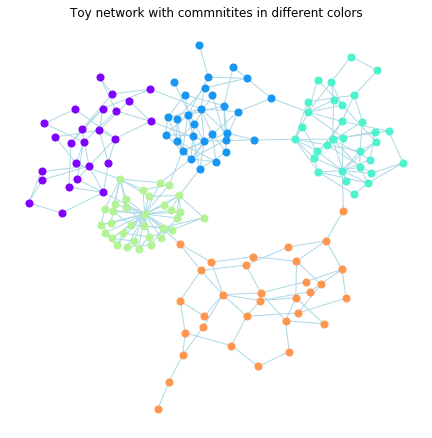

In [51]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.generators.community import LFR_benchmark_graph

##### Custom distinct color function --- to be used later
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)


# first, a simple toy example of modular network
n = 150
tau1 = 3.0
tau2 = 2.0
mu = 0.0675
G_list = []
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5,
                        min_community=25, seed=10)



# drawing the graph --- Kamada-Kawai layout
# without community assignment
plt.figure(figsize=[7.5,7.5])
pos = nx.kamada_kawai_layout(G, weight=None) # positions for all nodes

# extracting community assignment indices
commIndSet = {frozenset(G.nodes[v]['community']) for v in G}
commInd = [list(x) for x in iter(commIndSet)]
nComm = len(commInd)

# drawing with community assignment
node_color_list = get_cmap(nComm+1,'rainbow')
nx.draw_networkx_edges(G, pos, edge_color='lightblue')
for iComm in range(nComm):
    nx.draw_networkx_nodes(G, pos, nodelist=commInd[iComm],
                           node_color = np.array([node_color_list(iComm)]),
                           node_size=50)
plt.title('Toy network with commnitites in different colors')
plt.axis('off')
plt.show()

## 2.2 Why should we care about network communities?

# Outline

* What is a network?
  * Nodes, edges, degree, etc
  * Example networks
     * Les Miserables network
     * fMRI brain network
  * How network data is stored (adjacency matrix)   
* Network communities
  * Motivating example
  * Why do we care?
     * Santa Fe collaboration network
  * How do we find communities
     * Maximizing modularity
     * Louvain method
     
* Application -- network communities
  * Les Miserables network
  * fMRI brain network